In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.metrics import RootMeanSquaredError

# 데이터불러오기

## train data

In [ ]:
train_df = pd.read_csv('movies_train.csv')

In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB
None


## submission data

In [ ]:
submission_df = pd.read_csv('movies_test.csv')
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


# train, submission 합치기

In [ ]:
all_df = pd.concat([train_df, submission_df])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


# 불필요 컬럼 삭제

In [ ]:
all_df.drop(columns = ['title',
                       'distributor',
                       'genre',
                       'release_time',
                       'screening_rat',
                       'director'], inplace = True)

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            843 non-null    int64  
 1   dir_prev_bfnum  377 non-null    float64
 2   dir_prev_num    843 non-null    int64  
 3   num_staff       843 non-null    int64  
 4   num_actor       843 non-null    int64  
 5   box_off_num     600 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 46.1 KB


# 결측치 처리 

In [ ]:
all_df = all_df.fillna(0)

# 전처리 전 데이터 분포 보기

## time

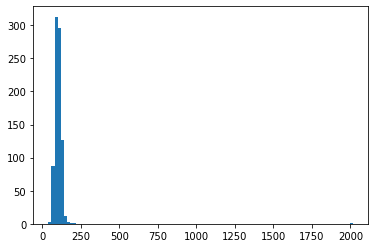

In [ ]:
plt.hist(all_df.time, bins = 100)
plt.show()

## dir_prev_bfnum  

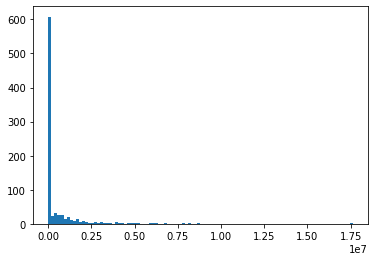

In [ ]:
plt.hist(all_df.dir_prev_bfnum, bins = 100)
plt.show()

## dir_prev_num    

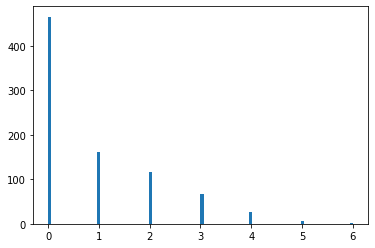

In [ ]:
plt.hist(all_df.dir_prev_num, bins = 100)
plt.show()

## num_staff  

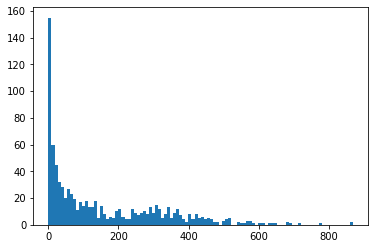

In [ ]:
plt.hist(all_df.num_staff, bins = 100)
plt.show()

## num_actor       

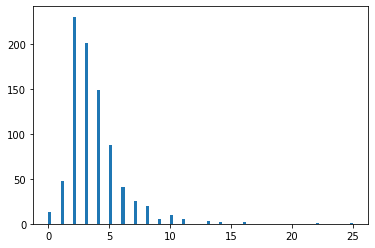

In [ ]:
plt.hist(all_df.num_actor, bins = 100)
plt.show()

## box_off_num

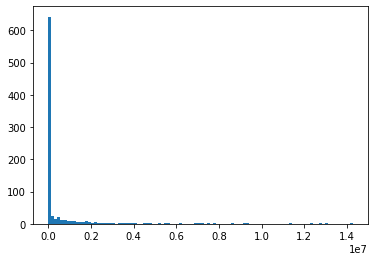

In [ ]:
plt.hist(all_df.box_off_num, bins = 100)
plt.show()

# column별 전처리

## time(250이 넘으면 이상치로 판단)

In [ ]:
all_df.loc[all_df.time > 200, 'time'] = 200

## dir_prev_bfnum(1을 더한 로그 처리)

In [ ]:
all_df['dir_prev_bfnum'] = np.log1p(all_df.dir_prev_bfnum)

## num_staff(1을 더한 로그 처리)

In [ ]:
all_df['num_staff'] = np.log1p(all_df.num_staff)

## num_actor(10보다 큰 이상치를 10으로 변경)

In [ ]:
all_df.loc[all_df.num_actor > 10, 'num_actor'] = 10

## box_off_num(1을 더한 로그 처리)

In [ ]:
all_df.box_off_num = np.log1p(all_df.box_off_num)

# data nomalization

In [ ]:
all_df['time']            = (all_df.time - all_df.time.min()) / ( all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum']  = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / ( all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num']    = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / ( all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff']       = (all_df.num_staff - all_df.num_staff.min()) / ( all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor']       = (all_df.num_actor - all_df.num_actor.min()) / ( all_df.num_actor.max() - all_df.num_actor.min())

## box_off_num은 따로 nomarlization

In [ ]:
y_max = all_df.box_off_num.max()
y_min = all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / ( y_max - y_min )

# 전처리 후 데이터 분포 보기

## time

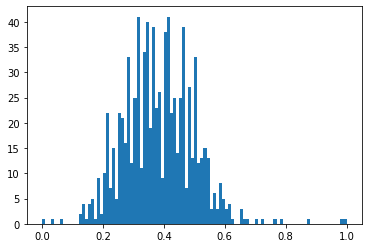

In [ ]:
plt.hist(all_df.time, bins = 100)
plt.show()

## dir_prev_bfnum  

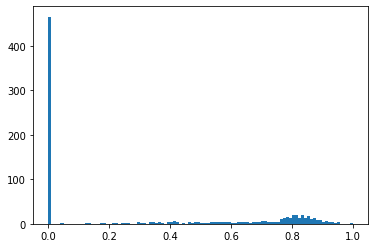

In [ ]:
plt.hist(all_df.dir_prev_bfnum, bins = 100)
plt.show()

## dir_prev_num    

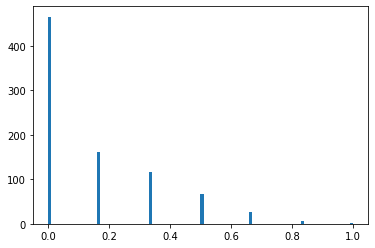

In [ ]:
plt.hist(all_df.dir_prev_num, bins = 100)
plt.show()

## num_staff  

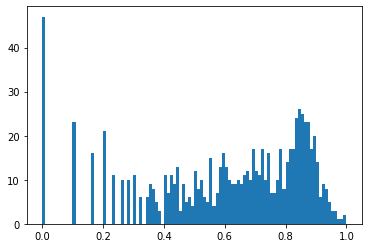

In [ ]:
plt.hist(all_df.num_staff, bins = 100)
plt.show()

## num_actor       

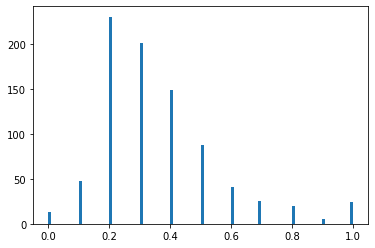

In [ ]:
plt.hist(all_df.num_actor, bins = 100)
plt.show()

## box_off_num

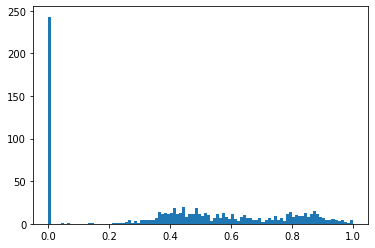

In [ ]:
plt.hist(all_df.box_off_num, bins = 100)
plt.show()

# train, test, submission 데이터로 분리

In [ ]:
train_df = all_df[0:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))

500
100
243


# x, y로 분리

In [ ]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns = ['box_off_num'])
train_x = train_x_df.to_numpy()

print(train_x.shape)
print(train_y.shape)

test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns = ['box_off_num']) 
test_x = test_x_df.to_numpy()

print(test_x.shape)
print(test_y.shape)

submission_x_df = submission_df.drop(columns = ['box_off_num'])
submission_x = submission_x_df.to_numpy()
print(submission_x.shape)

(500, 5)
(500,)
(100, 5)
(100,)
(243, 5)


# 딥러닝 학습

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 10)                60        
                                                                 
 dense_72 (Dense)            (None, 10)                110       
                                                                 
 dense_73 (Dense)            (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


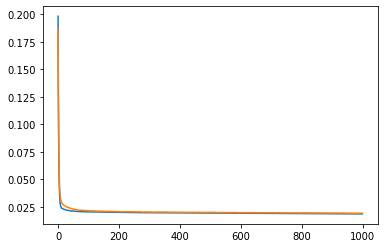

4/4 [==============================] - 0s 3ms/step - loss: 0.0174 - mape: 18.4159
loss = 0.01743973232805729
mape = 18.41587257385254


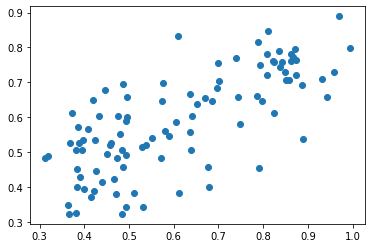

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(5,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss =", loss)
print("mape =", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

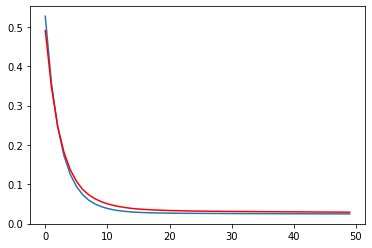

In [ ]:
plt.plot(history.history['loss'][:50])
plt.plot(history.history['val_loss'][:50], color = 'r')
plt.show()

# RMSE 계산하기

rmse =  tf.Tensor(1790387.6, shape=(), dtype=float32)


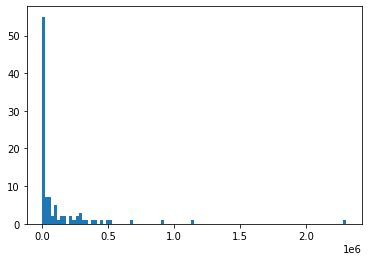

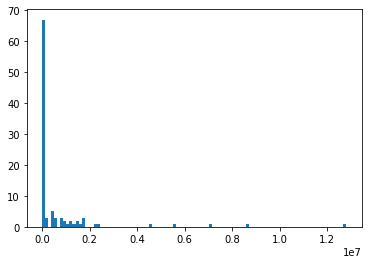

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError

pred_y = y_ * (y_max - y_min) +y_min
pred_y = np.exp(pred_y) - 1.

org_test_y = test_y * ( y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.


rmse = RootMeanSquaredError()(org_test_y, pred_y)
print('rmse = ', rmse)

plt.hist(pred_y, bins = 100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()

# 예측하기

In [ ]:
predicted = model.predict(submission_x)

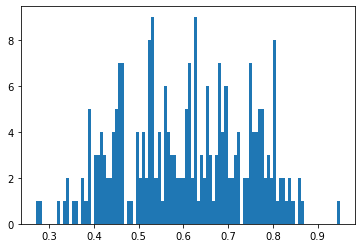

In [ ]:
plt.hist(predicted, bins =100)
plt.show()

In [ ]:
predicted = predicted * ( y_max - y_min) + y_min

In [ ]:
predicted = np.exp(predicted) - 1.

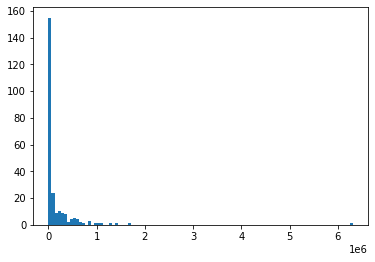

In [ ]:
plt.hist(predicted, bins=100)
plt.show()

# submission 파일 만들기 

In [ ]:
!head submission.csv

title,box_off_num
용서는 없다,395997
아빠가 여자를 좋아해,134727
하모니,609445
의형제,430041
평행 이론,287972
회오리 바람,21535
경계도시 2,2532
이웃집 남자,17513
아마존의 눈물 극장판,9469


In [ ]:
final_df = pd.DataFrame(submission_df.title)

In [ ]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,499714
1,아빠가 여자를 좋아해,305447
2,하모니,427771
3,의형제,474453
4,평행 이론,149084


In [ ]:
final_df.to_csv('submission.csv', index = False)

# 2번째 시도 (카테고리)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.metrics import RootMeanSquaredError

# 데이터불러오기

## train data

In [ ]:
train_df = pd.read_csv('movies_train.csv')

In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB
None


## submission data

In [ ]:
submission_df = pd.read_csv('movies_test.csv')
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


# train, submission 합치기

In [ ]:
all_df = pd.concat([train_df, submission_df])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


# 카테고리 데이터 인코딩

In [ ]:
all_df.distributor = all_df.distributor.astype('category')
all_df['distributer_code'] = all_df.distributor.cat.codes

all_df.genre = all_df.genre.astype('category')
all_df['genre_code'] = all_df.genre.cat.codes

all_df.screening_rat = all_df.screening_rat.astype('category')
all_df['screening_rat_code'] = all_df.screening_rat.cat.codes

# one - hot encoding

In [ ]:
all_df = pd.get_dummies(all_df, columns = ['distributer_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code']) 

# 컬럼 삭제

In [ ]:
all_df.drop(columns = ['title',
                       'distributor',
                       'genre',
                       'release_time',
                       'screening_rat',
                       'director'], inplace = True)

# 결측치 처리 

In [ ]:
all_df = all_df.fillna(0)

# 전처리 전 데이터 분포 보기

## time

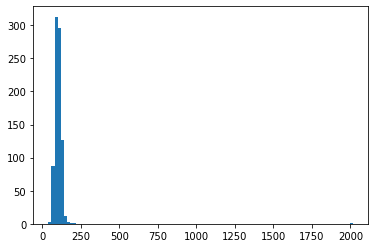

In [ ]:
plt.hist(all_df.time, bins = 100)
plt.show()

## dir_prev_bfnum  

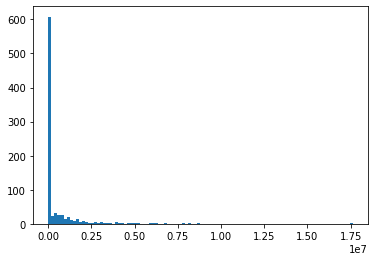

In [ ]:
plt.hist(all_df.dir_prev_bfnum, bins = 100)
plt.show()

## dir_prev_num    

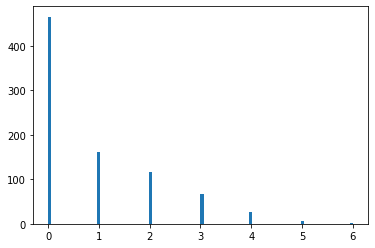

In [ ]:
plt.hist(all_df.dir_prev_num, bins = 100)
plt.show()

## num_staff  

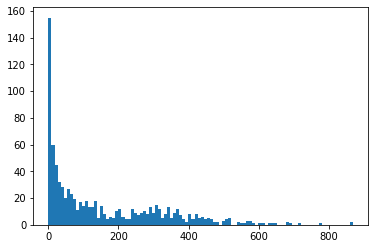

In [ ]:
plt.hist(all_df.num_staff, bins = 100)
plt.show()

## num_actor       

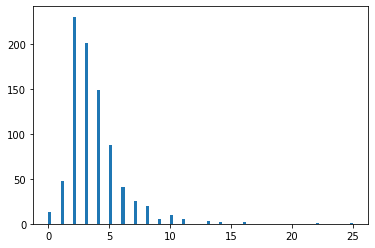

In [ ]:
plt.hist(all_df.num_actor, bins = 100)
plt.show()

## box_off_num

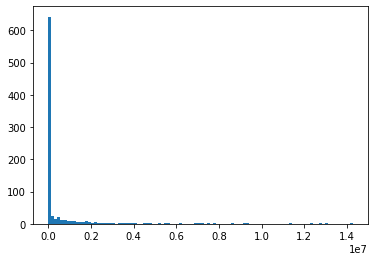

In [ ]:
plt.hist(all_df.box_off_num, bins = 100)
plt.show()

# column별 전처리

## time(250이 넘으면 이상치로 판단)

In [ ]:
all_df.loc[all_df.time > 200, 'time'] = 200

## dir_prev_bfnum(1을 더한 로그 처리)

In [ ]:
all_df['dir_prev_bfnum'] = np.log1p(all_df.dir_prev_bfnum)

## num_staff(1을 더한 로그 처리)

In [ ]:
all_df['num_staff'] = np.log1p(all_df.num_staff)

## num_actor(10보다 큰 이상치를 10으로 변경)

In [ ]:
all_df.loc[all_df.num_actor > 10, 'num_actor'] = 10

## box_off_num(1을 더한 로그 처리)

In [ ]:
all_df.box_off_num = np.log1p(all_df.box_off_num)

# data nomalization

In [ ]:
all_df['time']            = (all_df.time - all_df.time.min()) / ( all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum']  = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / ( all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num']    = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / ( all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff']       = (all_df.num_staff - all_df.num_staff.min()) / ( all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor']       = (all_df.num_actor - all_df.num_actor.min()) / ( all_df.num_actor.max() - all_df.num_actor.min())

## box_off_num은 따로 nomarlization

In [ ]:
y_max = all_df.box_off_num.max()
y_min = all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / ( y_max - y_min )

# 전처리 후 데이터 분포 보기

## time

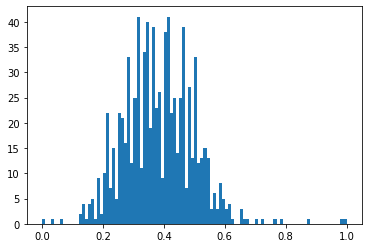

In [ ]:
plt.hist(all_df.time, bins = 100)
plt.show()

## dir_prev_bfnum  

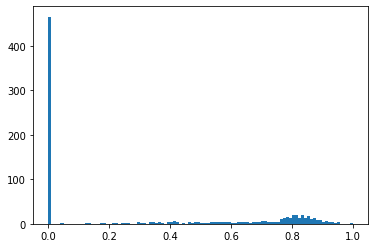

In [ ]:
plt.hist(all_df.dir_prev_bfnum, bins = 100)
plt.show()

## dir_prev_num    

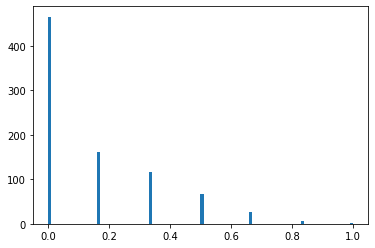

In [ ]:
plt.hist(all_df.dir_prev_num, bins = 100)
plt.show()

## num_staff  

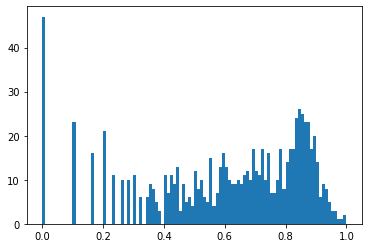

In [ ]:
plt.hist(all_df.num_staff, bins = 100)
plt.show()

## num_actor       

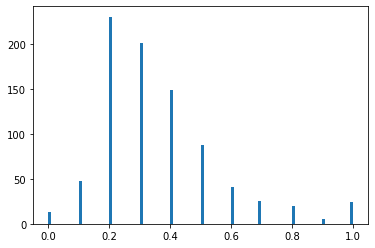

In [ ]:
plt.hist(all_df.num_actor, bins = 100)
plt.show()

## box_off_num

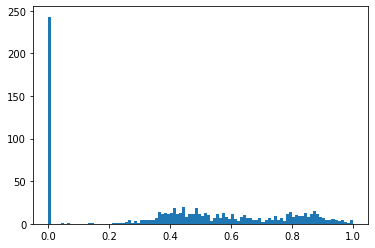

In [ ]:
plt.hist(all_df.box_off_num, bins = 100)
plt.show()

# train, test, submission 데이터로 분리

In [ ]:
train_df = all_df[0:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))

500
100
243


# x, y로 분리

In [ ]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns = ['box_off_num'])
train_x = train_x_df.to_numpy()

print(train_x.shape)
print(train_y.shape)

test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns = ['box_off_num']) 
test_x = test_x_df.to_numpy()

print(test_x.shape)
print(test_y.shape)

submission_x_df = submission_df.drop(columns = ['box_off_num'])
submission_x = submission_x_df.to_numpy()
print(submission_x.shape)

(500, 225)
(500,)
(100, 225)
(100,)
(243, 225)


# 딥러닝 학습

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 10)                2260      
                                                                 
 dense_78 (Dense)            (None, 10)                110       
                                                                 
 dense_79 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,381
Trainable params: 2,381
Non-trainable params: 0
_________________________________________________________________


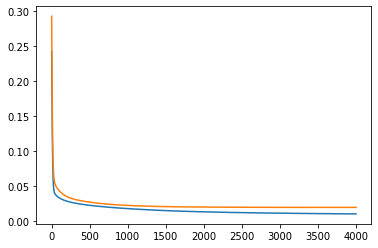

4/4 [==============================] - 0s 3ms/step - loss: 0.0138 - mape: 16.4984
loss = 0.013839884661138058
mape = 16.498371124267578


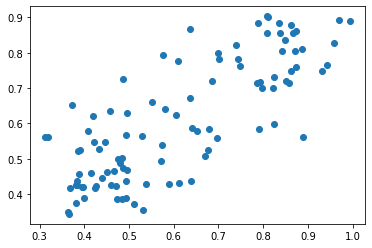

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=4000, verbose=0, batch_size=4096, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss =", loss)
print("mape =", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

rmse =  tf.Tensor(1669598.1, shape=(), dtype=float32)


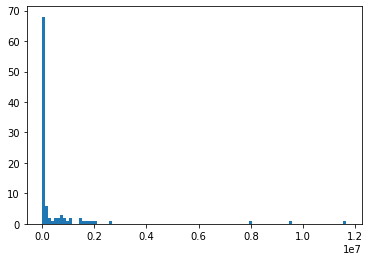

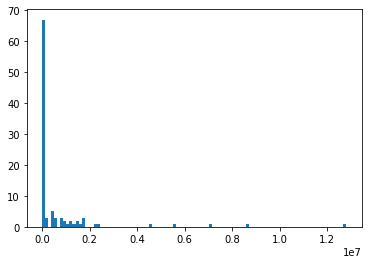

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError

pred_y = y_ * (y_max - y_min) +y_min
pred_y = np.exp(pred_y) - 1.

org_test_y = test_y * ( y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.


rmse = RootMeanSquaredError()(org_test_y, pred_y)
print('rmse = ', rmse)

plt.hist(pred_y, bins = 100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()

# batch_size 찾기

In [ ]:
import time 
for batch_size in [16,22,64,128,256,512, 512*2, 512 * 4, 512 * 8 , 512* 16]:
  start = time.time()
  history = model.fit(train_x, train_y, epochs = 4, verbose = 0, batch_size =batch_size, validation_split = 0.1)
  print(batch_size, ":",time.time() - start) 

16 : 0.8423867225646973
22 : 0.7003037929534912
64 : 0.33710455894470215
128 : 0.27632641792297363
256 : 0.19606614112854004
512 : 0.1579451560974121
1024 : 0.32373714447021484
2048 : 0.41152381896972656
4096 : 0.4281654357910156
8192 : 0.3321239948272705


# -----------------------------------------------------------------------------------------

# 3번째 시도 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.metrics import RootMeanSquaredError

# 데이터불러오기

## train data

In [ ]:
train_df = pd.read_csv('movies_train.csv')

In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB
None


## submission data

In [ ]:
submission_df = pd.read_csv('movies_test.csv')
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


# train, submission 합치기

In [ ]:
all_df = pd.concat([train_df, submission_df])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


# release time 조정(년과 월만 추출)

In [ ]:
all_df['release_time'] = all_df['release_time'].str[:7]
all_df['release_time'][:5]

0    2012-11
1    2015-11
2    2013-06
3    2012-07
4    2010-11
Name: release_time, dtype: object

# 카테고리 데이터 인코딩

In [ ]:
all_df.distributor = all_df.distributor.astype('category')
all_df['distributer_code'] = all_df.distributor.cat.codes

all_df.genre = all_df.genre.astype('category')
all_df['genre_code'] = all_df.genre.cat.codes

all_df.screening_rat = all_df.screening_rat.astype('category')
all_df['screening_rat_code'] = all_df.screening_rat.cat.codes

all_df.release_time = all_df.release_time.astype('category')
all_df['release_time_code'] = all_df.release_time.cat.codes

# one - hot encoding

In [ ]:
all_df = pd.get_dummies(all_df, columns = ['distributer_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code']) 
all_df = pd.get_dummies(all_df, columns = ['release_time_code']) 

# 컬럼 삭제

In [ ]:
all_df.drop(columns = ['title',
                       'distributor',
                       'genre',
                       'release_time',
                       'screening_rat',
                       'director'], inplace = True)

# 결측치 처리 

In [ ]:
all_df = all_df.fillna(0)

# 전처리 전 데이터 분포 보기

In [ ]:
plt.hist(all_df.release_time, bins = 100)
plt.show()

AttributeError: ignored

## time

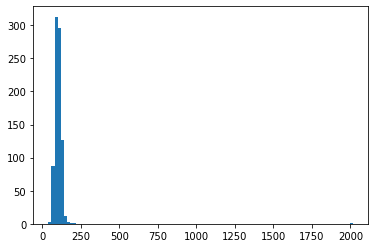

In [ ]:
plt.hist(all_df.time, bins = 100)
plt.show()

## dir_prev_bfnum  

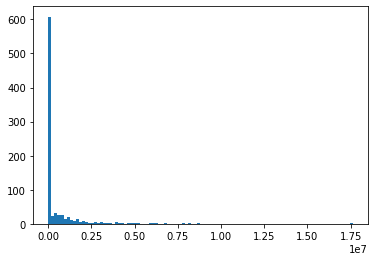

In [ ]:
plt.hist(all_df.dir_prev_bfnum, bins = 100)
plt.show()

## dir_prev_num    

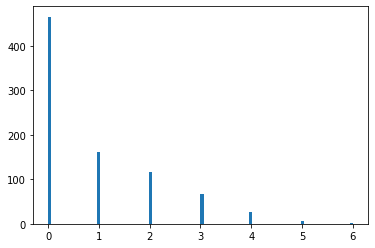

In [ ]:
plt.hist(all_df.dir_prev_num, bins = 100)
plt.show()

## num_staff  

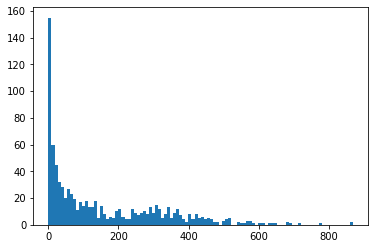

In [ ]:
plt.hist(all_df.num_staff, bins = 100)
plt.show()

## num_actor       

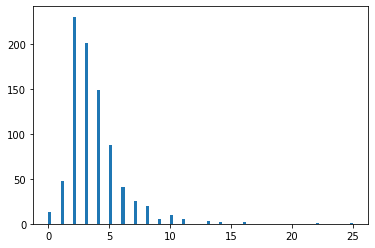

In [ ]:
plt.hist(all_df.num_actor, bins = 100)
plt.show()

## box_off_num

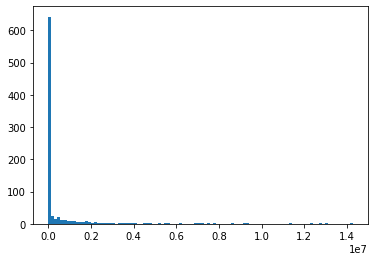

In [ ]:
plt.hist(all_df.box_off_num, bins = 100)
plt.show()

# column별 전처리

## time(250이 넘으면 이상치로 판단)

In [ ]:
all_df.loc[all_df.time > 200, 'time'] = 200

## dir_prev_bfnum(1을 더한 로그 처리)

In [ ]:
all_df['dir_prev_bfnum'] = np.log1p(all_df.dir_prev_bfnum)

## num_staff(1을 더한 로그 처리)

In [ ]:
all_df['num_staff'] = np.log1p(all_df.num_staff)

## num_actor(10보다 큰 이상치를 10으로 변경)

In [ ]:
all_df.loc[all_df.num_actor > 10, 'num_actor'] = 10

## box_off_num(1을 더한 로그 처리)

In [ ]:
all_df.box_off_num = np.log1p(all_df.box_off_num)

# data nomalization

In [ ]:
all_df['time']            = (all_df.time - all_df.time.min()) / ( all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum']  = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / ( all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num']    = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / ( all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff']       = (all_df.num_staff - all_df.num_staff.min()) / ( all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor']       = (all_df.num_actor - all_df.num_actor.min()) / ( all_df.num_actor.max() - all_df.num_actor.min())

## box_off_num은 따로 nomarlization

In [ ]:
y_max = all_df.box_off_num.max()
y_min = all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / ( y_max - y_min )

# 전처리 후 데이터 분포 보기

## time

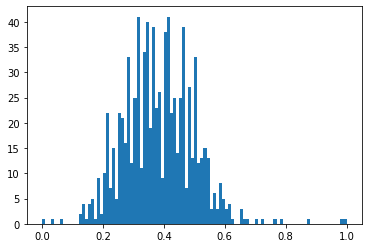

In [ ]:
plt.hist(all_df.time, bins = 100)
plt.show()

## dir_prev_bfnum  

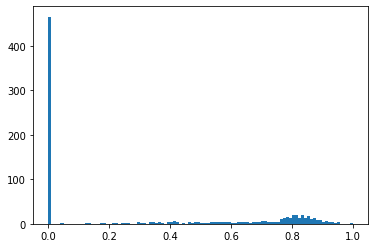

In [ ]:
plt.hist(all_df.dir_prev_bfnum, bins = 100)
plt.show()

## dir_prev_num    

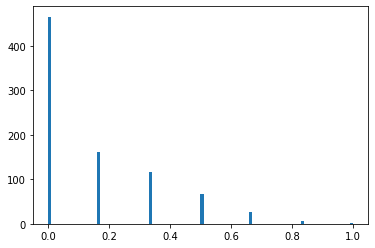

In [ ]:
plt.hist(all_df.dir_prev_num, bins = 100)
plt.show()

## num_staff  

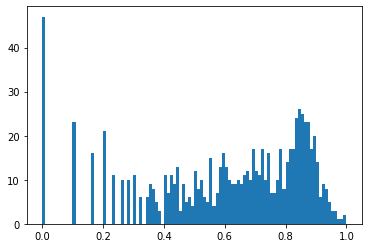

In [ ]:
plt.hist(all_df.num_staff, bins = 100)
plt.show()

## num_actor       

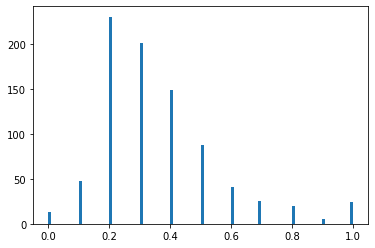

In [ ]:
plt.hist(all_df.num_actor, bins = 100)
plt.show()

## box_off_num

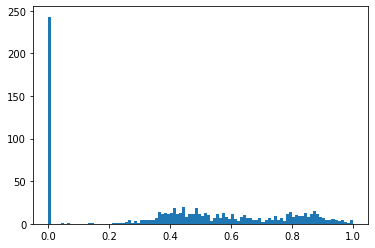

In [ ]:
plt.hist(all_df.box_off_num, bins = 100)
plt.show()

# train, test, submission 데이터로 분리

In [ ]:
train_df = all_df[0:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))

500
100
243


# x, y로 분리

In [ ]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns = ['box_off_num'])
train_x = train_x_df.to_numpy()

print(train_x.shape)
print(train_y.shape)

test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns = ['box_off_num']) 
test_x = test_x_df.to_numpy()

print(test_x.shape)
print(test_y.shape)

submission_x_df = submission_df.drop(columns = ['box_off_num'])
submission_x = submission_x_df.to_numpy()
print(submission_x.shape)

(500, 297)
(500,)
(100, 297)
(100,)
(243, 297)


# 딥러닝 학습

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 10)                2980      
                                                                 
 dense_84 (Dense)            (None, 10)                110       
                                                                 
 dense_85 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


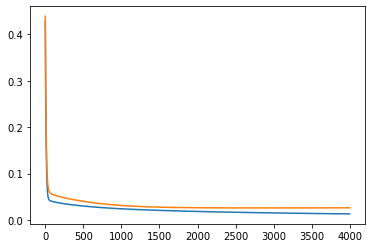

4/4 [==============================] - 0s 3ms/step - loss: 0.0179 - mape: 18.6892 - root_mean_squared_error: 0.1339
loss = 0.01793084479868412
mape = 18.689172744750977
rmse = 0.13390611112117767


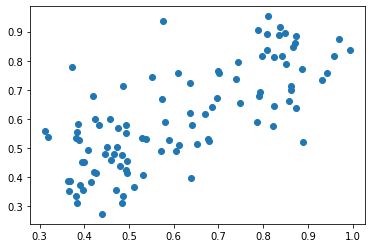

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape", RootMeanSquaredError()])
model.summary()

history = model.fit(train_x, train_y, epochs=4000, verbose=0, batch_size=4096, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape,rmse = model.evaluate(test_x, test_y)
print("loss =", loss)
print("mape =", mape)
print('rmse =', rmse)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

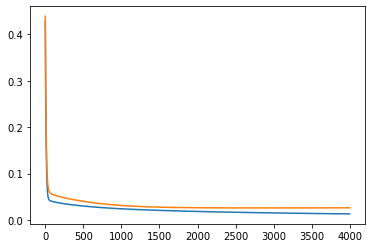

In [ ]:
plt.plot(history.history['loss'][-4000:])
plt.plot(history.history['val_loss'][-4000:])
plt.show()

rmse =  tf.Tensor(1941729.4, shape=(), dtype=float32)


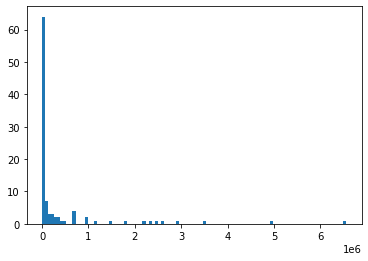

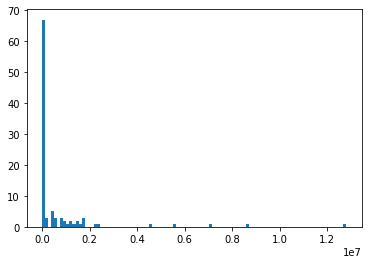

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError

pred_y = y_ * (y_max - y_min) +y_min
pred_y = np.exp(pred_y) - 1.

org_test_y = test_y * ( y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.


rmse = RootMeanSquaredError()(org_test_y, pred_y)
print('rmse = ', rmse)

plt.hist(pred_y, bins = 100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()

# ---------------------------------------------------------------------------------------------------------------------------------

# 4번째 시도(director 카테고리)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.metrics import RootMeanSquaredError

# 데이터불러오기

## train data

In [ ]:
train_df = pd.read_csv('movies_train.csv')

In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB
None


## submission data

In [ ]:
submission_df = pd.read_csv('movies_test.csv')
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


# train, submission 합치기

In [ ]:
all_df = pd.concat([train_df, submission_df])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


# director 컬럼 카테고리화

In [ ]:
len(all_df.director.unique())

614

In [ ]:
all_df.loc[all_df.dir_prev_num == 0, 'director'] = '무명감독'

In [ ]:
len(all_df.director.unique())

291

# release time 조정(년과 월만 추출)

In [ ]:
all_df['release_time'] = all_df['release_time'].str[:7]
all_df['release_time'][:5]

0    2012-11
1    2015-11
2    2013-06
3    2012-07
4    2010-11
Name: release_time, dtype: object

# 카테고리 데이터 인코딩

In [ ]:
all_df.distributor = all_df.distributor.astype('category')
all_df['distributer_code'] = all_df.distributor.cat.codes

all_df.genre = all_df.genre.astype('category')
all_df['genre_code'] = all_df.genre.cat.codes

all_df.screening_rat = all_df.screening_rat.astype('category')
all_df['screening_rat_code'] = all_df.screening_rat.cat.codes

all_df.release_time = all_df.release_time.astype('category')
all_df['release_time_code'] = all_df.release_time.cat.codes

all_df.director = all_df.director.astype('category')
all_df['director_code'] = all_df.director.cat.codes

# one - hot encoding

In [ ]:
all_df = pd.get_dummies(all_df, columns = ['distributer_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code']) 
all_df = pd.get_dummies(all_df, columns = ['release_time_code']) 
all_df = pd.get_dummies(all_df, columns = ['director_code']) 

# 컬럼 삭제

In [ ]:
all_df.drop(columns = ['title',
                       'distributor',
                       'genre',
                       'release_time',
                       'screening_rat',
                       'director'], inplace = True)

# 결측치 처리 

In [ ]:
all_df = all_df.fillna(0)

# 전처리 전 데이터 분포 보기

## time

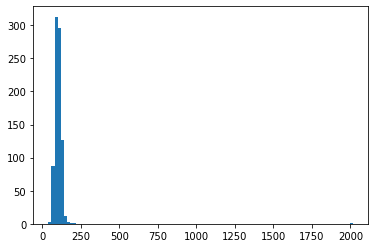

In [ ]:
plt.hist(all_df.time, bins = 100)
plt.show()

## dir_prev_bfnum  

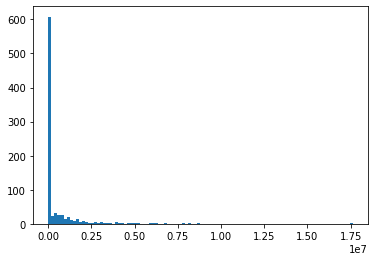

In [ ]:
plt.hist(all_df.dir_prev_bfnum, bins = 100)
plt.show()

## dir_prev_num    

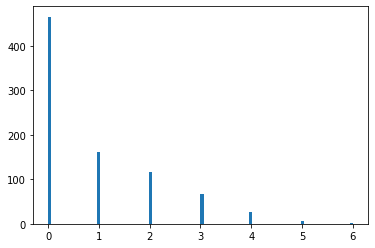

In [ ]:
plt.hist(all_df.dir_prev_num, bins = 100)
plt.show()

## num_staff  

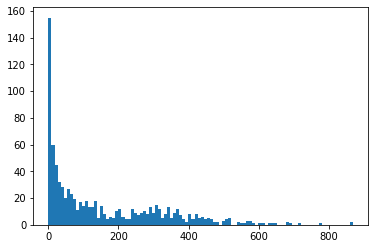

In [ ]:
plt.hist(all_df.num_staff, bins = 100)
plt.show()

## num_actor       

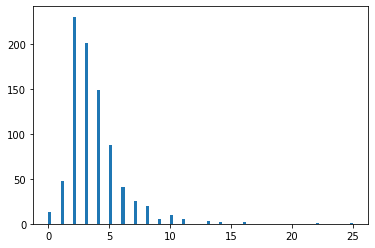

In [ ]:
plt.hist(all_df.num_actor, bins = 100)
plt.show()

## box_off_num

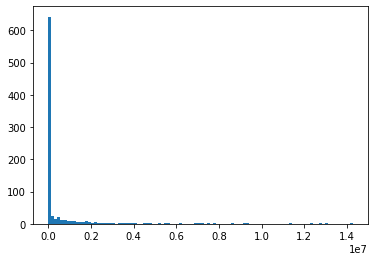

In [ ]:
plt.hist(all_df.box_off_num, bins = 100)
plt.show()

# column별 전처리

## time(250이 넘으면 이상치로 판단)

In [ ]:
all_df.loc[all_df.time > 200, 'time'] = 200

## dir_prev_bfnum(1을 더한 로그 처리)

In [ ]:
all_df['dir_prev_bfnum'] = np.log1p(all_df.dir_prev_bfnum)

## num_staff(1을 더한 로그 처리)

In [ ]:
all_df['num_staff'] = np.log1p(all_df.num_staff)

## num_actor(10보다 큰 이상치를 10으로 변경)

In [ ]:
all_df.loc[all_df.num_actor > 10, 'num_actor'] = 10

## box_off_num(1을 더한 로그 처리)

In [ ]:
all_df.box_off_num = np.log1p(all_df.box_off_num)

# data nomalization

In [ ]:
all_df['time']            = (all_df.time - all_df.time.min()) / ( all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum']  = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / ( all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num']    = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / ( all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff']       = (all_df.num_staff - all_df.num_staff.min()) / ( all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor']       = (all_df.num_actor - all_df.num_actor.min()) / ( all_df.num_actor.max() - all_df.num_actor.min())

## box_off_num은 따로 nomarlization

In [ ]:
y_max = all_df.box_off_num.max()
y_min = all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / ( y_max - y_min )

# 전처리 후 데이터 분포 보기

## time

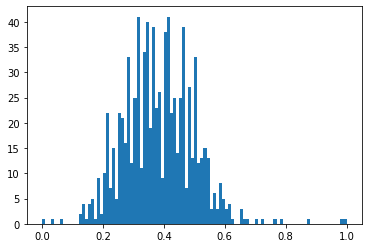

In [ ]:
plt.hist(all_df.time, bins = 100)
plt.show()

## dir_prev_bfnum  

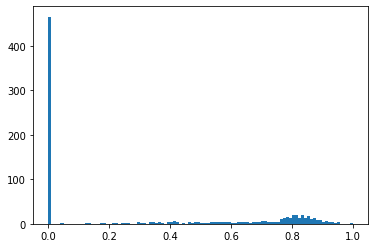

In [ ]:
plt.hist(all_df.dir_prev_bfnum, bins = 100)
plt.show()

## dir_prev_num    

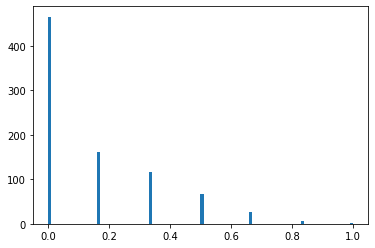

In [ ]:
plt.hist(all_df.dir_prev_num, bins = 100)
plt.show()

## num_staff  

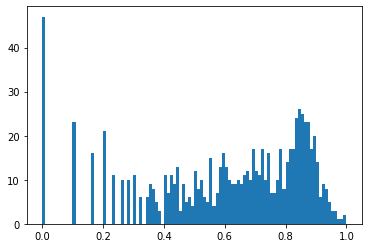

In [ ]:
plt.hist(all_df.num_staff, bins = 100)
plt.show()

## num_actor       

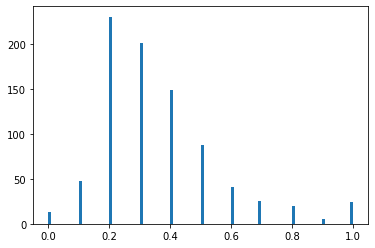

In [ ]:
plt.hist(all_df.num_actor, bins = 100)
plt.show()

## box_off_num

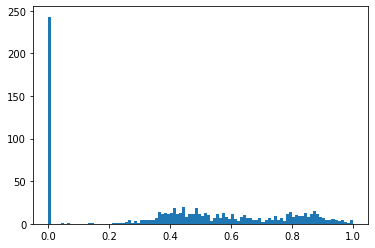

In [ ]:
plt.hist(all_df.box_off_num, bins = 100)
plt.show()

# train, test, submission 데이터로 분리

In [ ]:
train_df = all_df[0:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))

500
100
243


# x, y로 분리

In [ ]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns = ['box_off_num'])
train_x = train_x_df.to_numpy()

print(train_x.shape)
print(train_y.shape)

test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns = ['box_off_num']) 
test_x = test_x_df.to_numpy()

print(test_x.shape)
print(test_y.shape)

submission_x_df = submission_df.drop(columns = ['box_off_num'])
submission_x = submission_x_df.to_numpy()
print(submission_x.shape)

(500, 588)
(500,)
(100, 588)
(100,)
(243, 588)


# 딥러닝 학습

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 256)               150784    
                                                                 
 dense_102 (Dense)           (None, 10)                2570      
                                                                 
 dense_103 (Dense)           (None, 1)                 11        
                                                                 
Total params: 153,365
Trainable params: 153,365
Non-trainable params: 0
_________________________________________________________________


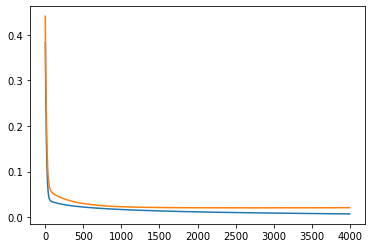

4/4 [==============================] - 0s 3ms/step - loss: 0.0157 - mape: 17.1760 - root_mean_squared_error: 0.1252
loss = 0.015673601999878883
mape = 17.176021575927734
rmse = 0.125194251537323


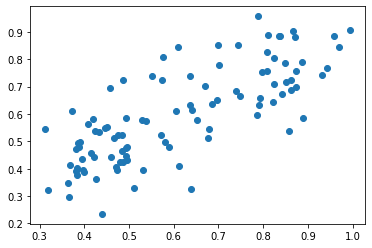

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError

model = keras.Sequential()
model.add(Dense(256, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape", RootMeanSquaredError()])
model.summary()

history = model.fit(train_x, train_y, epochs=4000, verbose=0, batch_size=4096, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape,rmse = model.evaluate(test_x, test_y)
print("loss =", loss)
print("mape =", mape)
print('rmse =', rmse)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

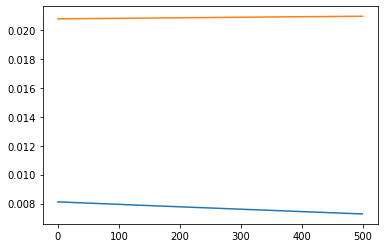

In [ ]:
plt.plot(history.history['loss'][-500:])
plt.plot(history.history['val_loss'][-500:])
plt.show()

rmse =  tf.Tensor(1746241.6, shape=(), dtype=float32)


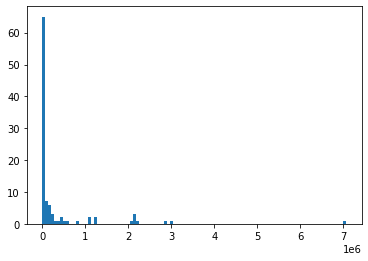

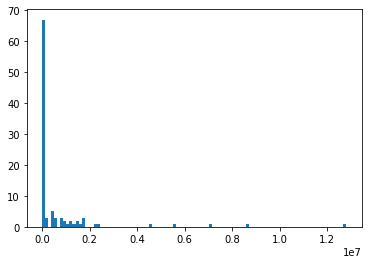

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError

pred_y = y_ * (y_max - y_min) +y_min
pred_y = np.exp(pred_y) - 1.

org_test_y = test_y * ( y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.


rmse = RootMeanSquaredError()(org_test_y, pred_y)
print('rmse = ', rmse)

plt.hist(pred_y, bins = 100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()

# submission 만들기

In [ ]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [ ]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,499714
1,아빠가 여자를 좋아해,305447
2,하모니,427771
3,의형제,474453
4,평행 이론,149084


In [ ]:
final_df.to_csv("submission.csv", index=False)